In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

print('Train images:', train_images.shape)
print('Train labels', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: torch.Size([60000, 1, 28, 28])
Train labels torch.Size([60000])
Test images: torch.Size([10000, 1, 28, 28])
Test labels: torch.Size([10000])


In [3]:
train_images_flat = train_images.view(train_images.size(0), -1)
train_images_flat.shape

torch.Size([60000, 784])

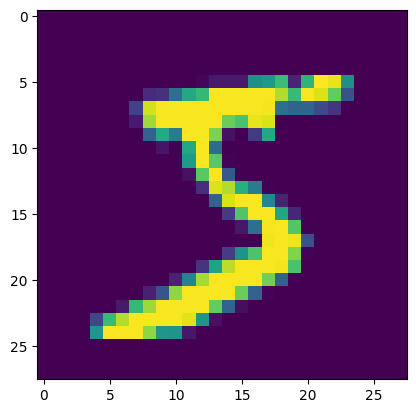

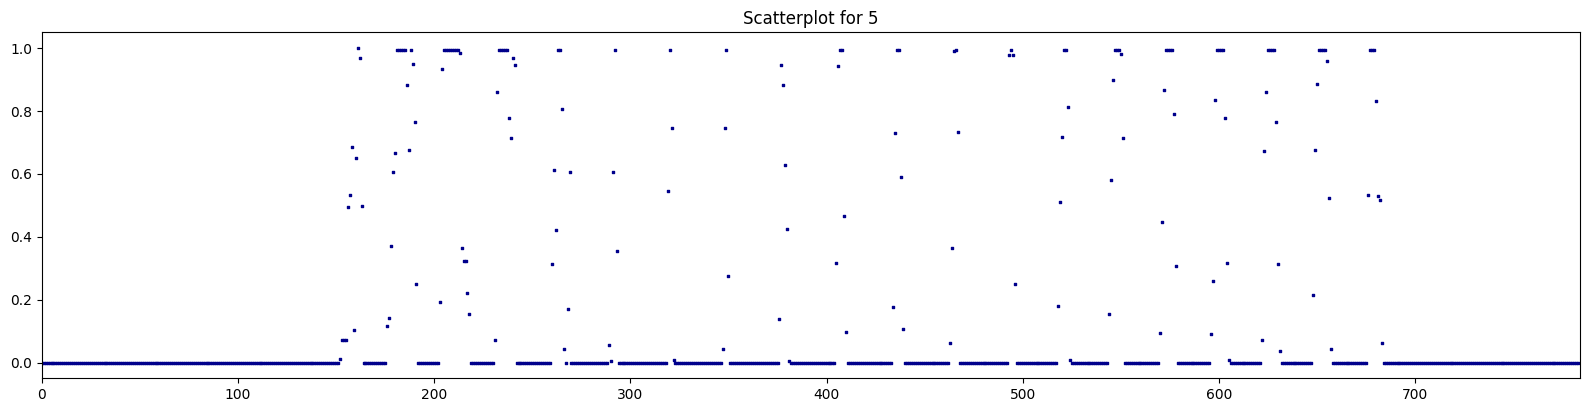

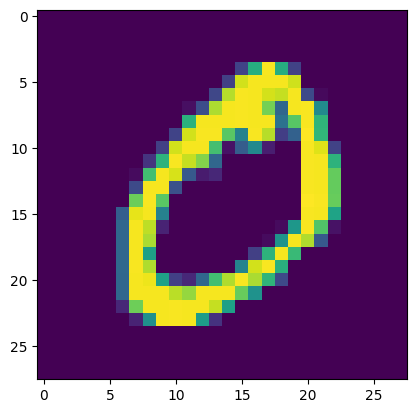

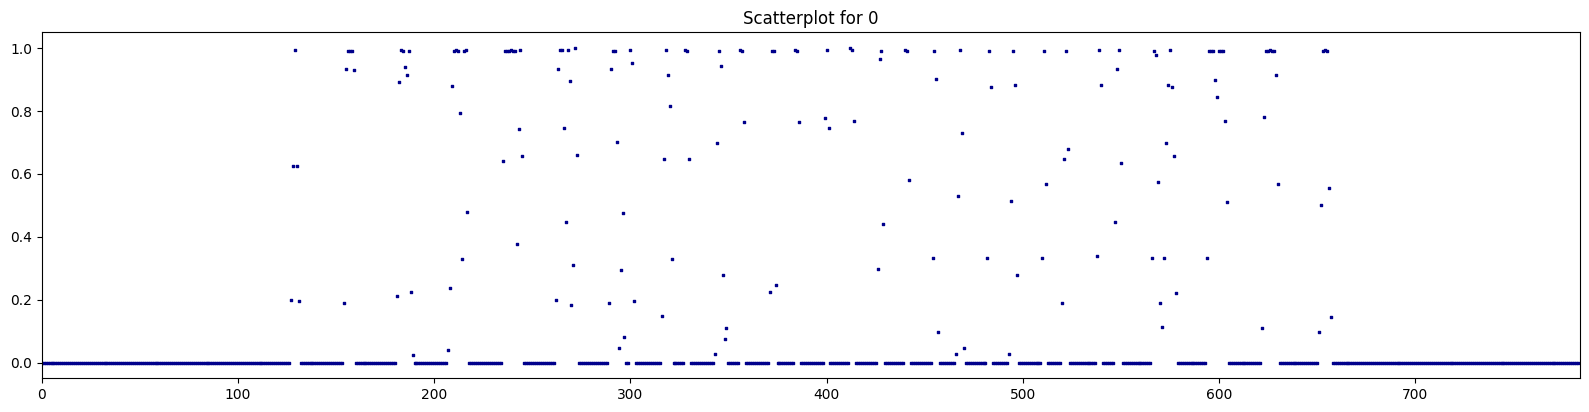

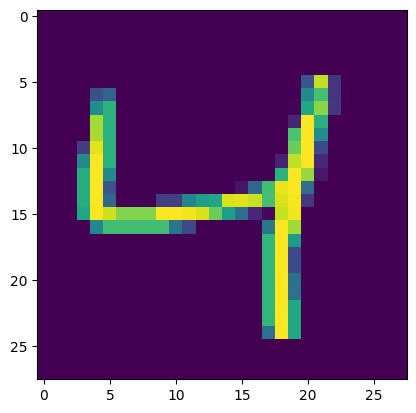

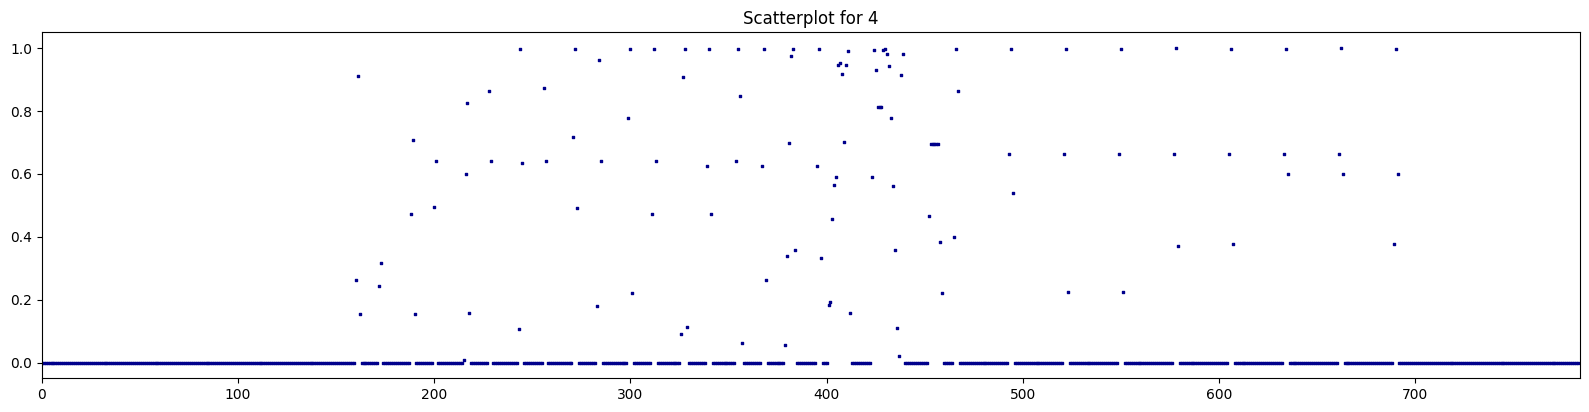

In [ ]:
def plt_number(y,title):
    x = np.arange(784)
    plt.figure(figsize=(16,4))
    plt.scatter(x, y, s=4, c='darkblue', marker=',')
    plt.xlim(0, 784) 
    plt.tight_layout()
    plt.title(f"Scatterplot for {title}")
    plt.show()

for i in range(3):
    y = train_images_flat[i]
    plt.imshow(train_images[i][0])
    plt_number(y, train_labels[i].item())


In [5]:
print('Train images:', train_images.shape)
print('Train labels', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)
train_images_flat.shape

Train images: torch.Size([60000, 1, 28, 28])
Train labels torch.Size([60000])
Test images: torch.Size([10000, 1, 28, 28])
Test labels: torch.Size([10000])


torch.Size([60000, 784])

In [6]:
def split_by_label_list(images, labels):
    out = []
    for d in range(10):
        idx = (labels == d).nonzero(as_tuple=True)[0]
        cls_imgs = images[idx].squeeze(1)          
        out.append(cls_imgs)
    return out
train_by_digit = split_by_label_list(train_images, train_labels)
test_by_digit = split_by_label_list(test_images, test_labels)

In [7]:
averages_train = []
averages_test = []
for d in range(10):
    avg_train = train_by_digit[d].float().mean(dim=0)
    avg_test = train_by_digit[d].float().mean(dim=0)
    averages_train.append(avg_train)
    averages_test.append(avg_test)

averages_train = torch.stack(averages_train)
averages_test = torch.stack(averages_test)

print(averages_train.shape)
print(averages_test.shape)

torch.Size([10, 28, 28])
torch.Size([10, 28, 28])


train


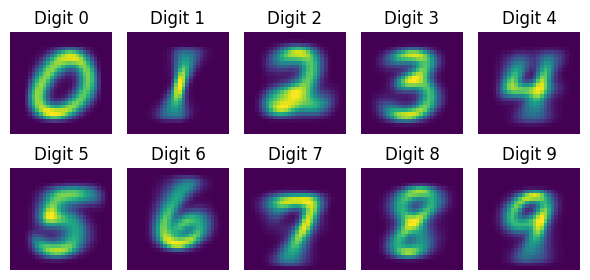

test


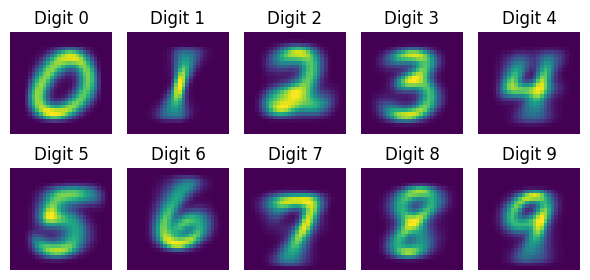

In [27]:
def show_avg(train_or_test):
    fig, axes = plt.subplots(2, 5, figsize=(6, 3))
    for i in range(10):
        ax = axes[i // 5, i % 5]  
        ax.imshow(train_or_test[i])
        ax.set_title(f"Digit {i}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()
print('train')
show_avg(averages_train)
print('test')
show_avg(averages_test)

In [ ]:
train_images_average_flat = averages_train.view(averages_train.size(0), -1)
test_images_average_flat = averages_test.view(averages_test.size(0), -1)

torch.Size([10, 784])


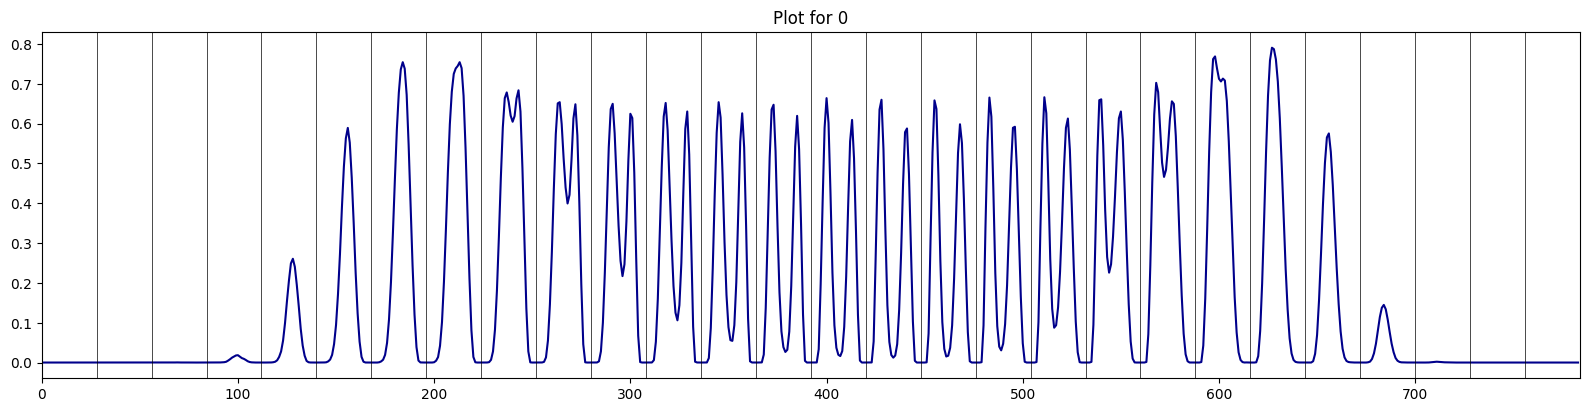

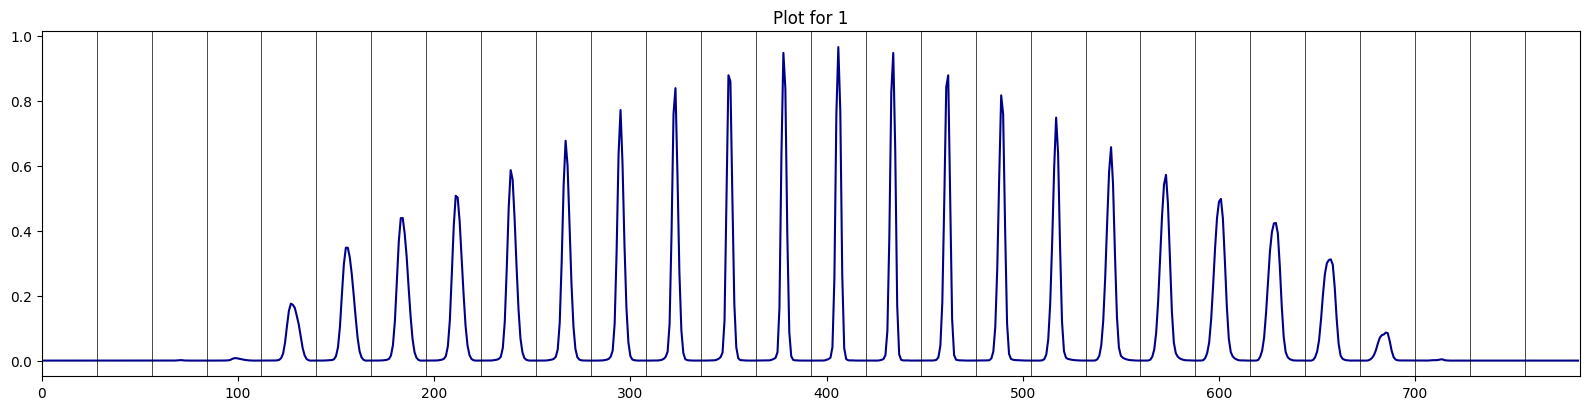

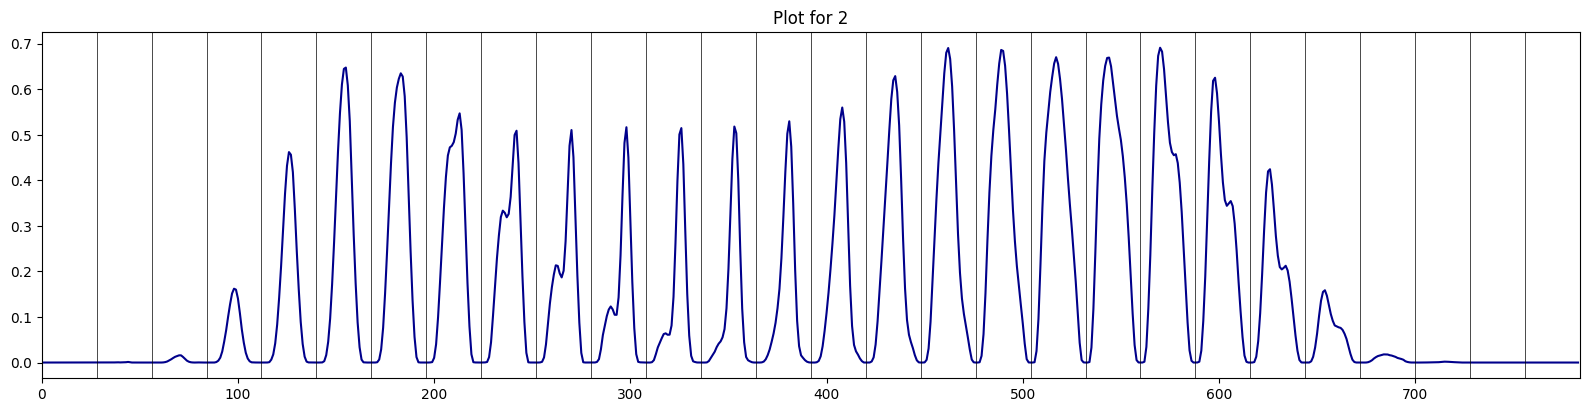

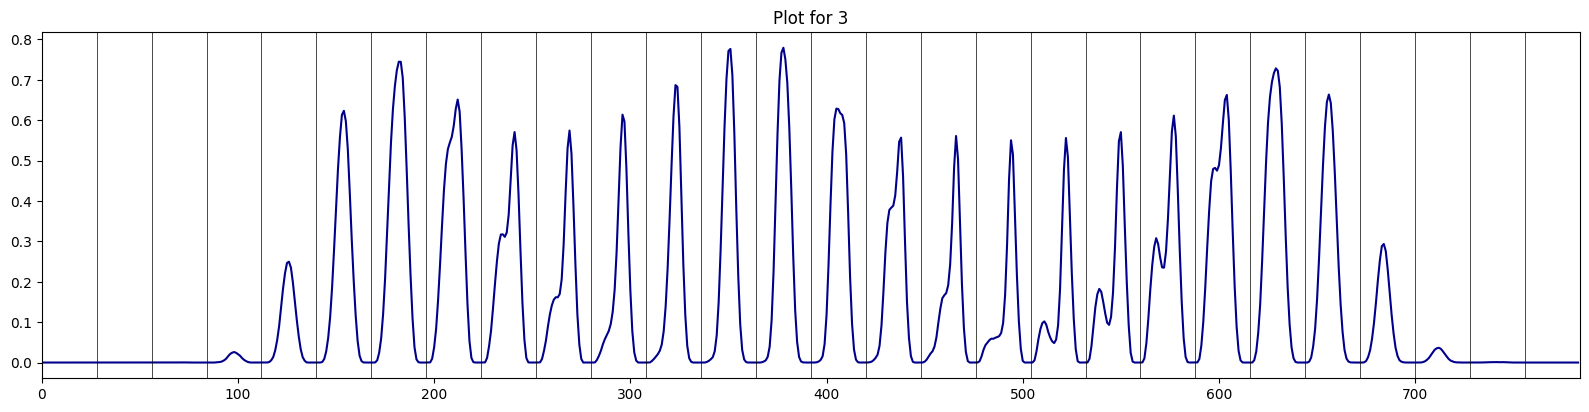

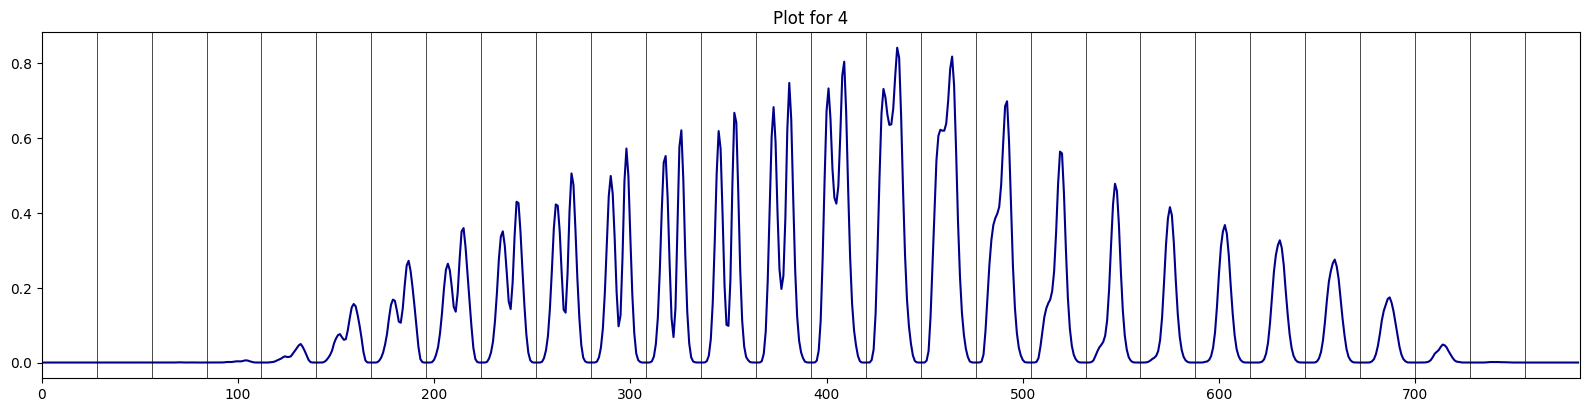

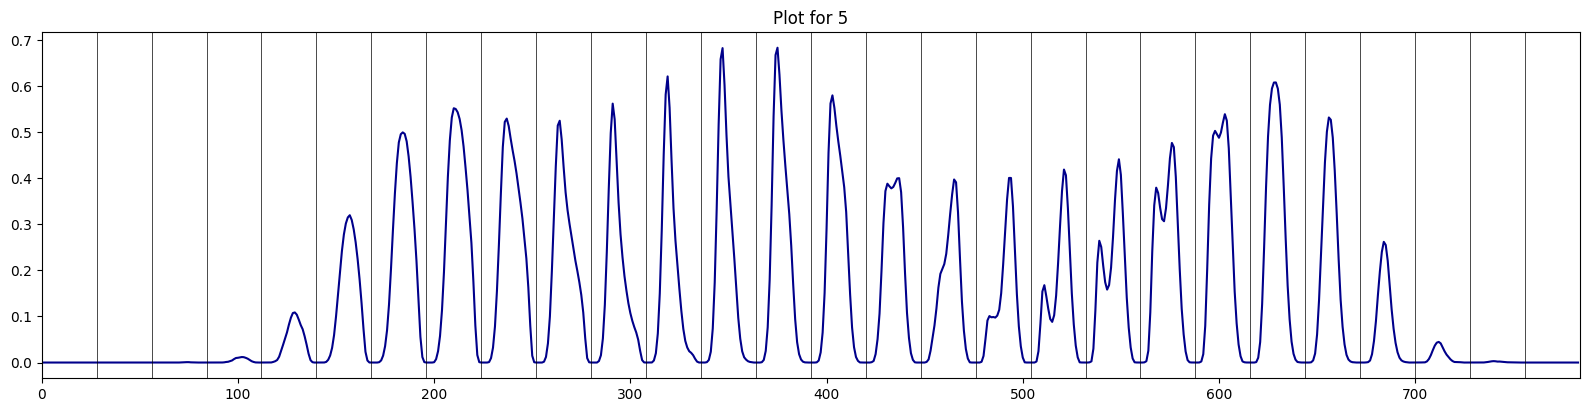

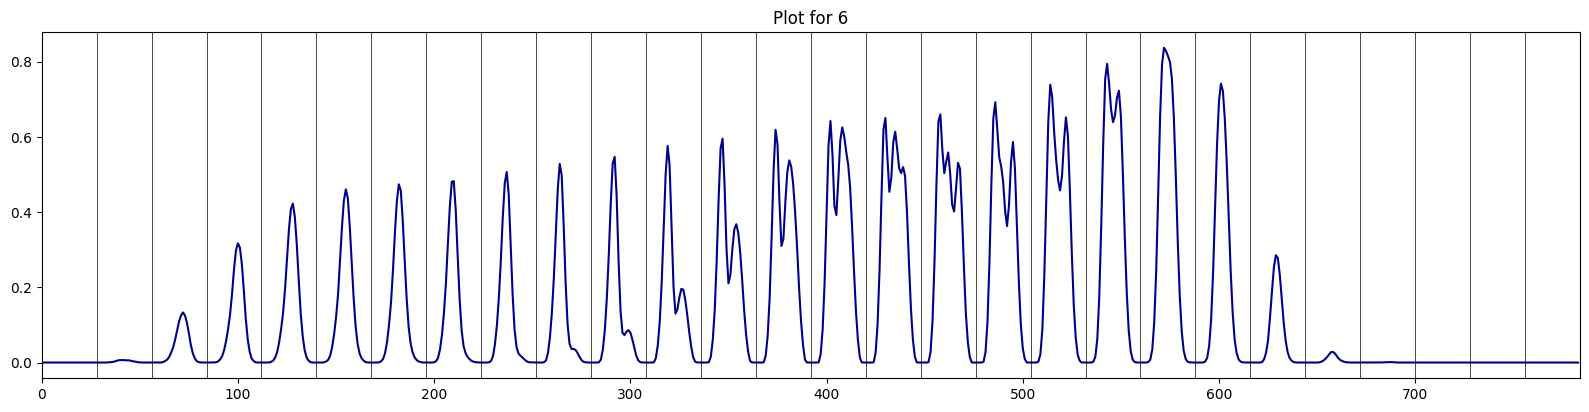

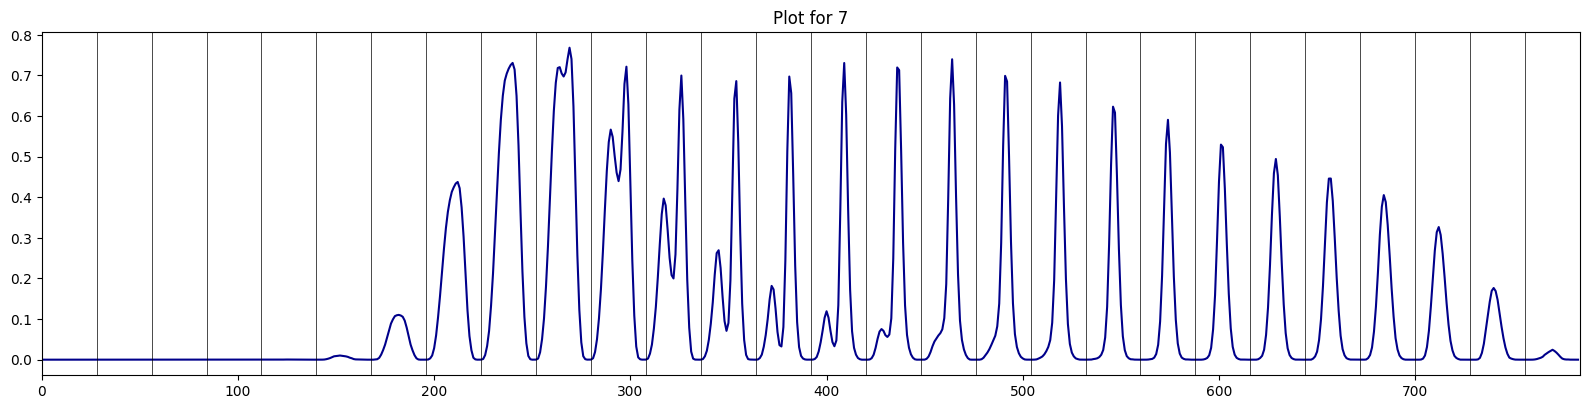

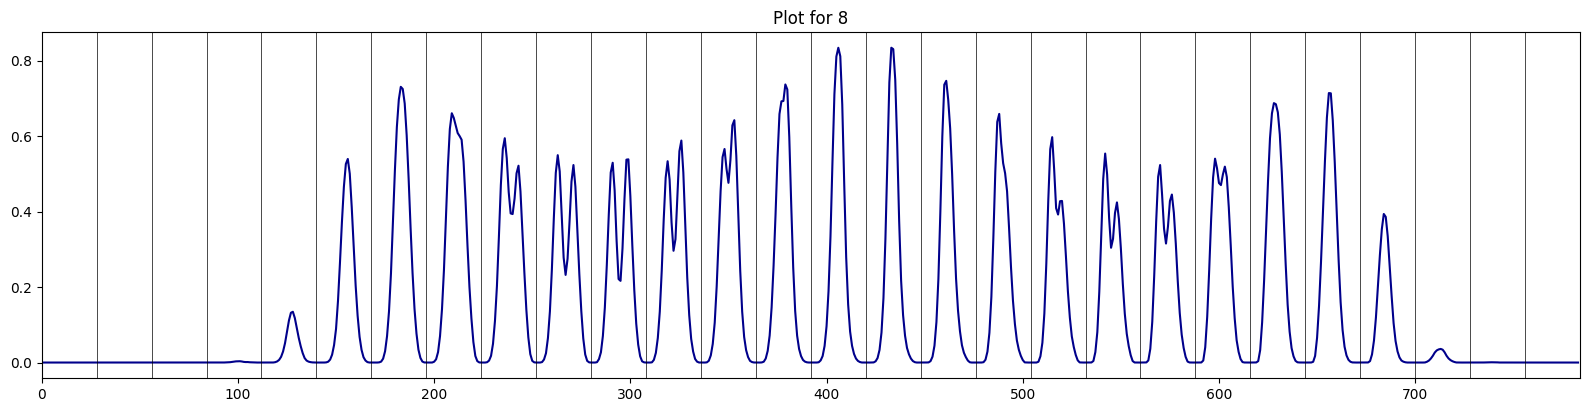

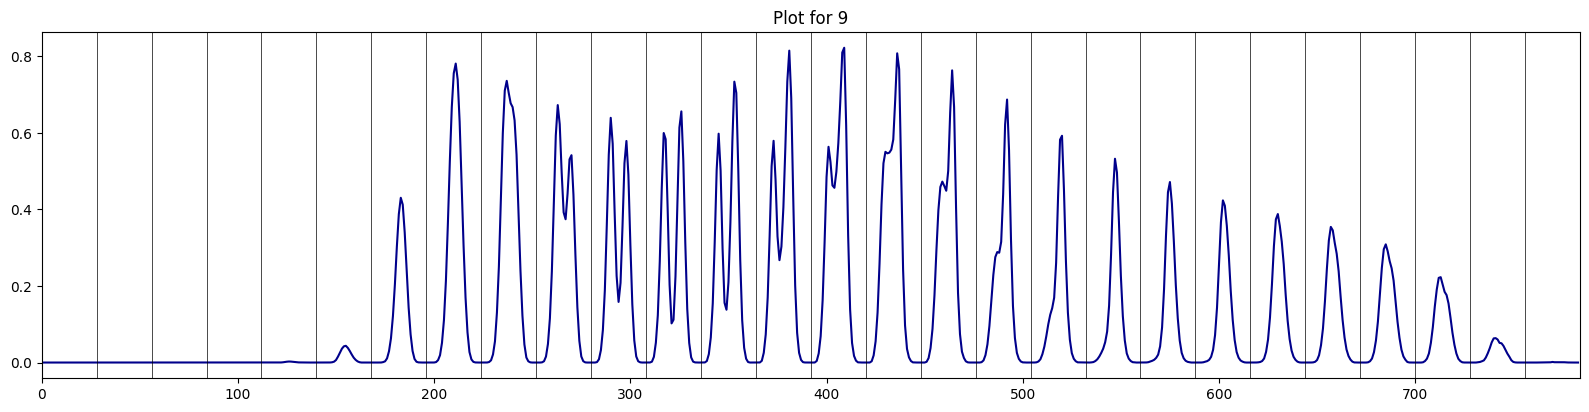

In [26]:
def plt_number(y,title):
    plt.figure(figsize=(16,4))
    plt.plot(y,c='darkblue')
    plt.xlim(0, 784) 
    plt.tight_layout()
    plt.title(f"Plot for {title}")
    for x in range(0, 785, 28):
        plt.axvline(x, color="black", linestyle="-", linewidth=0.5)
    plt.show()

for d in range(10):
    plt_number(train_images_average_flat[d], str(d))